# Image Upscaler

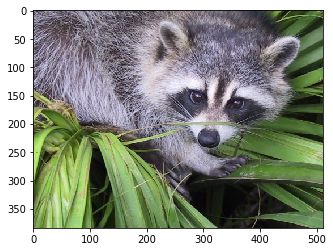

In [33]:
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

img = Image.open('racoon.jpg')
plt.imshow(img)
plt.show()
racoon = imread('racoon.jpg')
# plt.imshow(racoon); plt.show()

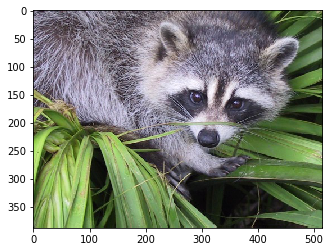

In [34]:
def padImage(image):
    h,w,v = image.shape
    paddedImage = np.zeros((h+4,w+4,v))
    padH, padW, padV = paddedImage.shape
    #top left corner
    paddedImage[0:1,0:1,:] = image[0,0,:]
    #top right corner
    paddedImage[0:1,padW-2:,:] = image[0,w-1,:]
    #bottom left corner
    paddedImage[padH-2:padH-1,0:1,:] = image[h-1,0,:]
    #bottom right corner
    paddedImage[padH-2:padH-1,padW-2:,:] = image[h-1,w-1,:]
    #top row
    paddedImage[0,2:padW-2,:] = image[0,:,:]
    #bottom row
    paddedImage[padH-1,2:padW-2,:] = image[h-1,:,:]
    #left column
    paddedImage[2:padH-2,0,:] = image[:,0,:]
    #right column
    paddedImage[2:padH-2,padW-1,:] = image[:,w-1,:]
    #the rest
    paddedImage[2:padH-2,2:padW-2,:] = image[:,:,:]
    return paddedImage
    
image = np.asarray(img.convert('RGB'))
h,w,v = image.shape
(h,w,v)
paddedImage = padImage(image)

# toShow = Image.fromarray(paddedImage, 'RGB')
plt.imshow(paddedImage.astype(np.uint8))
plt.show()



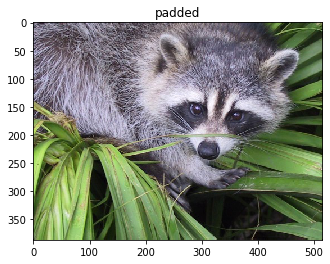

In [35]:
def plotImage(image, title=""):
    im = np.array(image, dtype=np.uint8)
    plt.imshow(im, vmin = 0, vmax = 255)
    plt.title(title)
    plt.show()
plotImage(paddedImage, "padded")

In [71]:
def upscaleImage(paddedImage):
    h,w,v = paddedImage.shape
    toReturn = np.zeros(((h-4)*2,(w-4)*2,v))
    print("paddedImageShape", (h,w,v))
    print("toReturnShape", toReturn.shape)
    for i in range(0,(h-4)*2):
        hIndex = math.floor(i/2.0)+2
        for j in range(0,(w-4)*2):
#             print(i,j)
            wIndex= math.floor(j/2.0)+2
            if (i%2 == 0 and j%2 == 0):
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex-1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1 and j%2 == 1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex+1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex-1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif j%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex+1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex,:])/4
    return toReturn

paddedImageShape (388, 516, 3)
toReturnShape (768, 1024, 3)


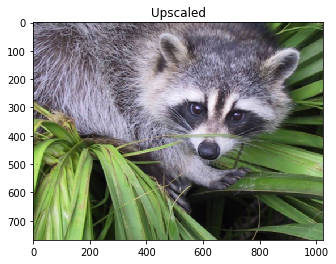

In [72]:
upscaledImage = upscaleImage(paddedImage)
plotImage(upscaledImage, "Upscaled")